## Summarizing the data

In [24]:
file0.beeswax <- "Rice 3e Datasets/ASCII Comma/Chapter 10/beeswax.txt"
data.beeswax <- read.table(file = file0.beeswax, sep = ",", header = TRUE)
head(data.beeswax)

MeltingPoint,Hydrocarbon
63.78,14.27
63.45,14.80
63.58,12.28
63.08,17.09
63.40,15.10
64.42,12.92


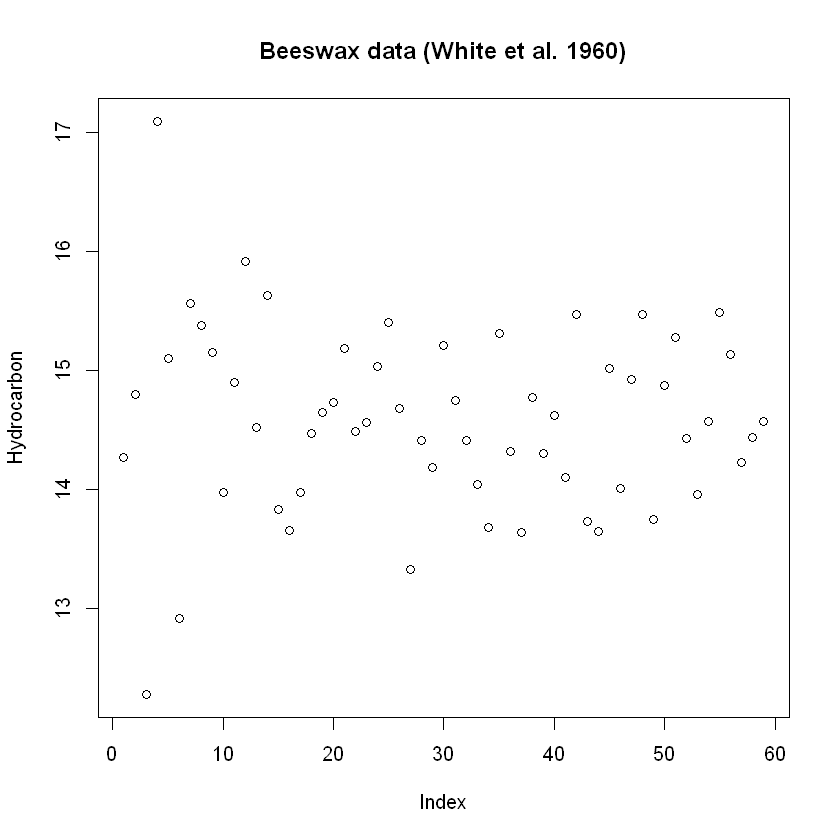

In [25]:
x.label = "Hydrocarbon"
x = data.beeswax[,x.label]

plot(x, ylab = x.label, main = "Beeswax data (White et al. 1960)")

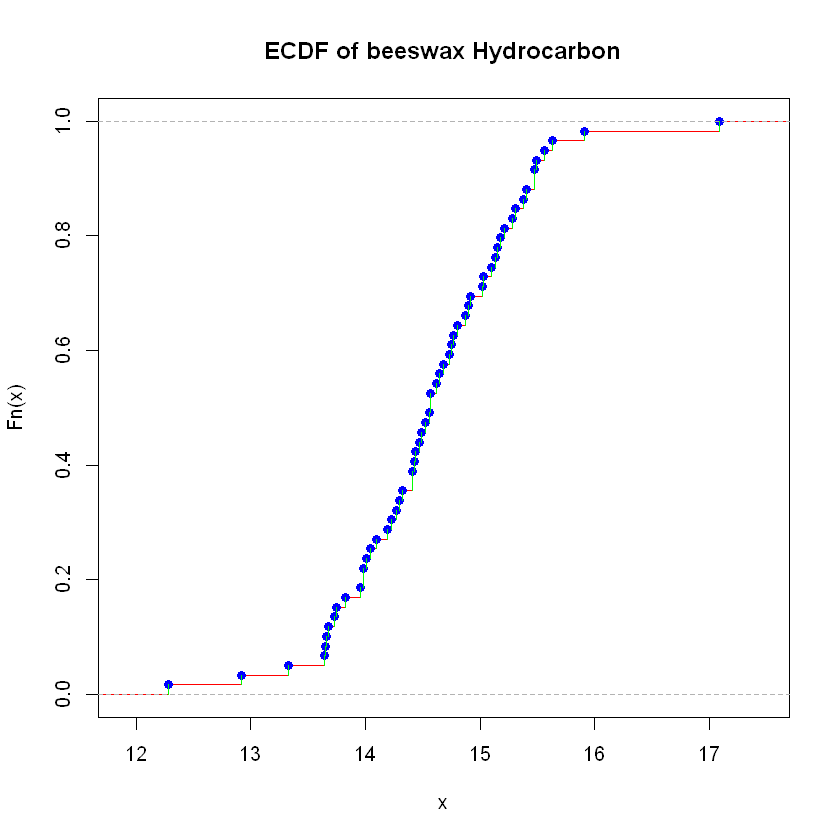

In [26]:
# Plot of ECDF

plot(ecdf(x), verticals = TRUE, col.points = 'blue', col.hor = 'red', col.vert = 'green',
    main = paste("ECDF of beeswax ", x.label, sep = ''))

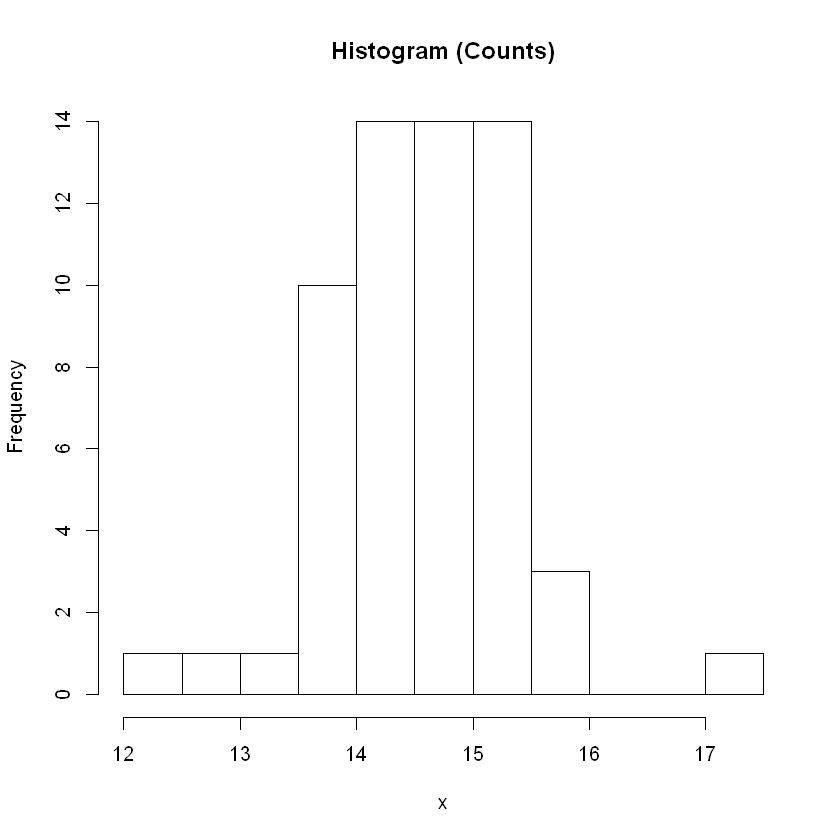

In [27]:
# Histogram

hist(x, main = "Histogram (Counts)")

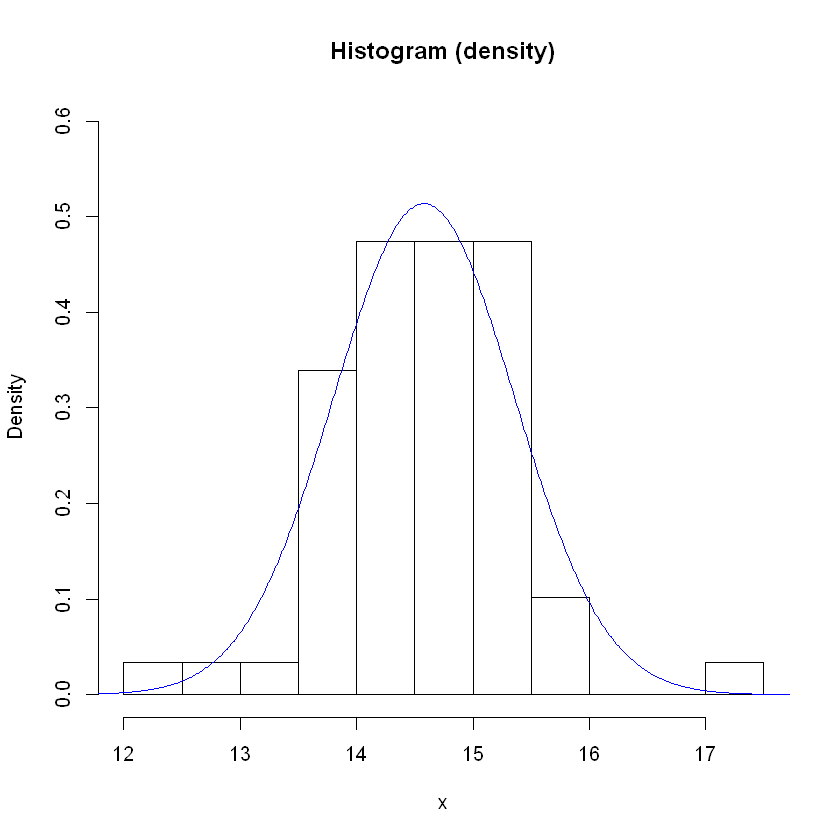

In [28]:
hist(x, main = "Histogram (density)", probability = TRUE, ylim = c(0, .6))

# Add plot of fitted Normal
grid.x <- seq(.95*min(x), 1.05*max(x), .01)
x.mean = mean(x)
x.var = var(x)
grid.x.normdensity = dnorm(grid.x, mean = x.mean, sd = sqrt(x.var))
lines(grid.x, grid.x.normdensity, col = 'blue', lwd = 1.5)

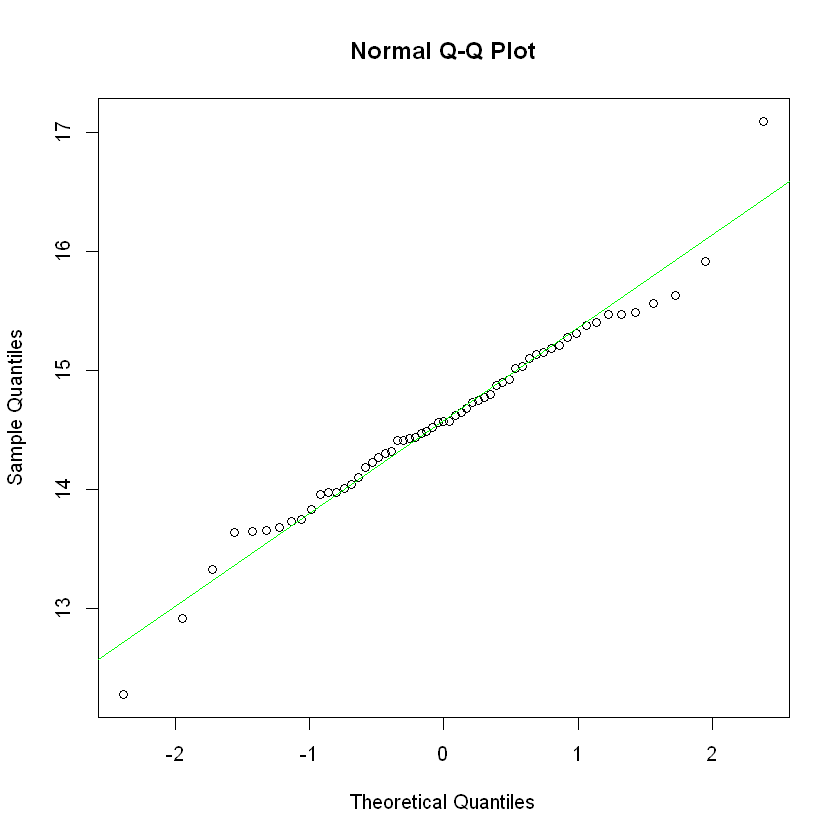

In [29]:
# Normal Q-Q plot

qqnorm(x)

abline(a = x.mean, b = sqrt(x.var), col = 'green')

In [30]:
# Compute selected quantiles

list.probs = c(.10, .25, .50, .75, .90)
print(data.frame(cbind(prob = list.probs, quantile = quantile(x, probs = list.probs))))

    prob quantile
10% 0.10   13.676
25% 0.25   14.070
50% 0.50   14.570
75% 0.75   15.115
90% 0.90   15.470


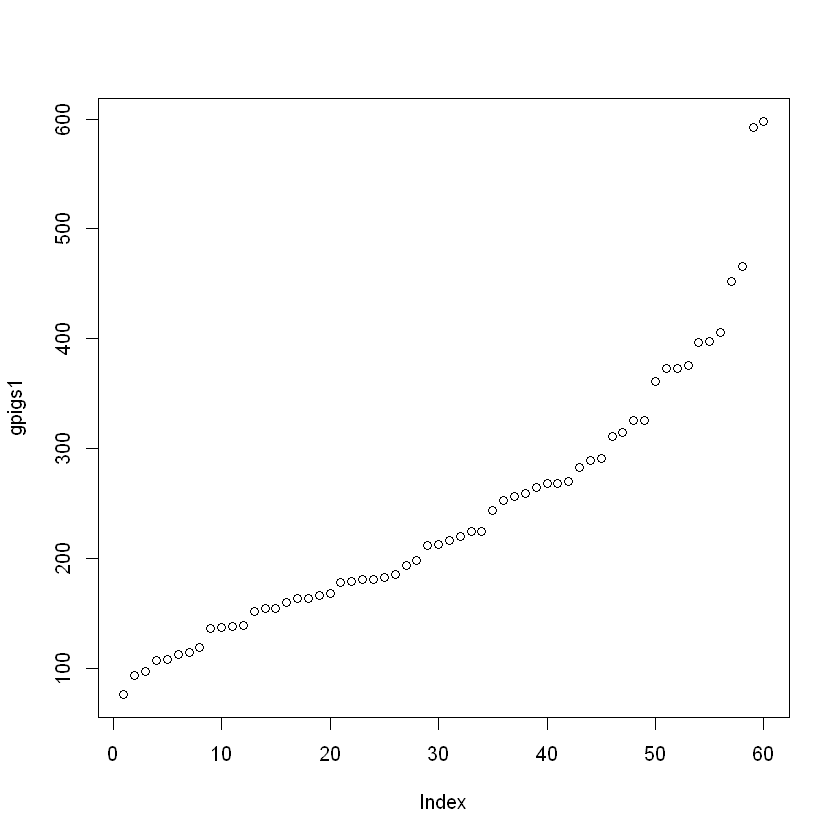

In [31]:
gpigs1 = scan(file = "Rice 3e Datasets/ASCII Comma/Chapter 10/gpigs1.txt", sep = ",")
gpigs2 = scan(file = "Rice 3e Datasets/ASCII Comma/Chapter 10/gpigs2.txt", sep = ",")
gpigs3 = scan(file = "Rice 3e Datasets/ASCII Comma/Chapter 10/gpigs3.txt", sep = ",")
gpigs4 = scan(file = "Rice 3e Datasets/ASCII Comma/Chapter 10/gpigs4.txt", sep = ",")
gpigs5 = scan(file = "Rice 3e Datasets/ASCII Comma/Chapter 10/gpigs5.txt", sep = ",")
gpigscontrol = scan(file = "Rice 3e Datasets/ASCII Comma/Chapter 10/gpigscontrol.txt", sep = ",")

plot(gpigs1)

In [32]:
# Compute empirical survival functions

fcn.ecdf <- function(x, n = 72){
    if (sum(1*(diff(x)<0)) == 0){
        x.0 = x
        x.0.ecdf = c(1:length(x.0))/(n+1)
        return(x.0.ecdf)
    }
    else{
        return(NULL)
    }
}

gpigs1.esf <- 1 - fcn.ecdf(gpigs1)
gpigs2.esf <- 1 - fcn.ecdf(gpigs2)
gpigs3.esf <- 1 - fcn.ecdf(gpigs3)
gpigs4.esf <- 1 - fcn.ecdf(gpigs4)
gpigs5.esf <- 1 - fcn.ecdf(gpigs5)
gpigscontrol.esf <- 1 - fcn.ecdf(gpigscontrol, n = 107)

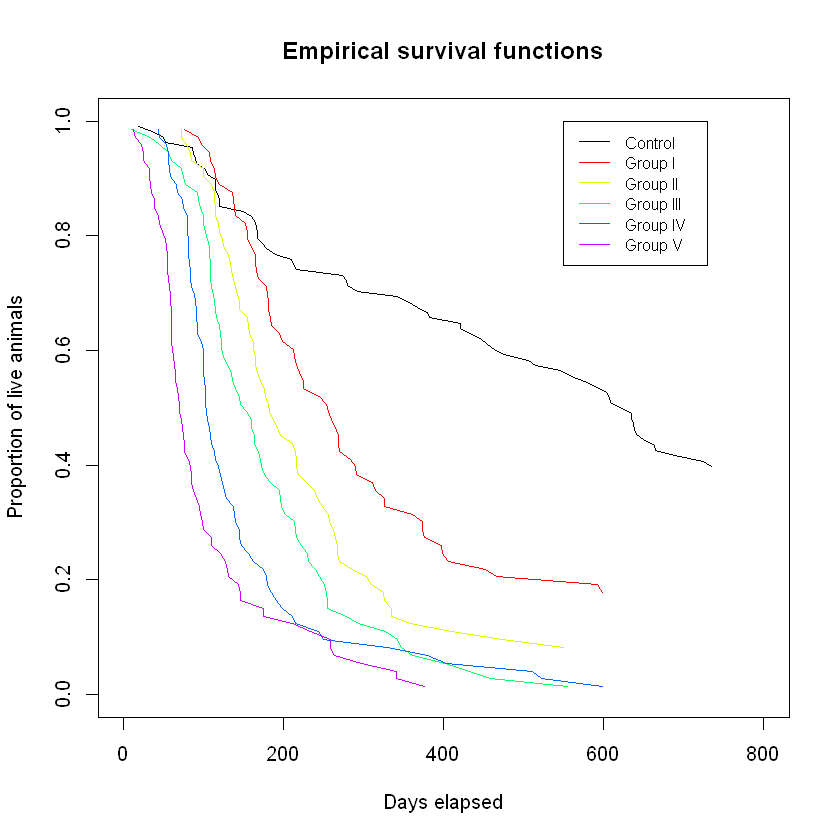

In [33]:
# Plot empirical survival functions

xlim0 = c(0, 800.)
ylim0 = c(0, 1.)

plot(gpigscontrol, gpigscontrol.esf, xlim = xlim0, ylim = ylim0, main = "Empirical survival functions",
    xlab = "Days elapsed", ylab = "Proportion of live animals", type = "l", col = 'black')

cols.groups <- rainbow(5)

lines(gpigs1, gpigs1.esf, lty = 1, col = cols.groups[1])
lines(gpigs2, gpigs2.esf, lty = 1, col = cols.groups[2])
lines(gpigs3, gpigs3.esf, lty = 1, col = cols.groups[3])
lines(gpigs4, gpigs4.esf, lty = 1, col = cols.groups[4])
lines(gpigs5, gpigs5.esf, lty = 1, col = cols.groups[5])

legend(x = 550, y = 1.0, legend = c("Control", paste("Group ", c("I", "II", "III", "IV", "V"), sep = "")),
      lty = rep(1, times = 6), 
       col = c('black', cols.groups),
       cex = .8)

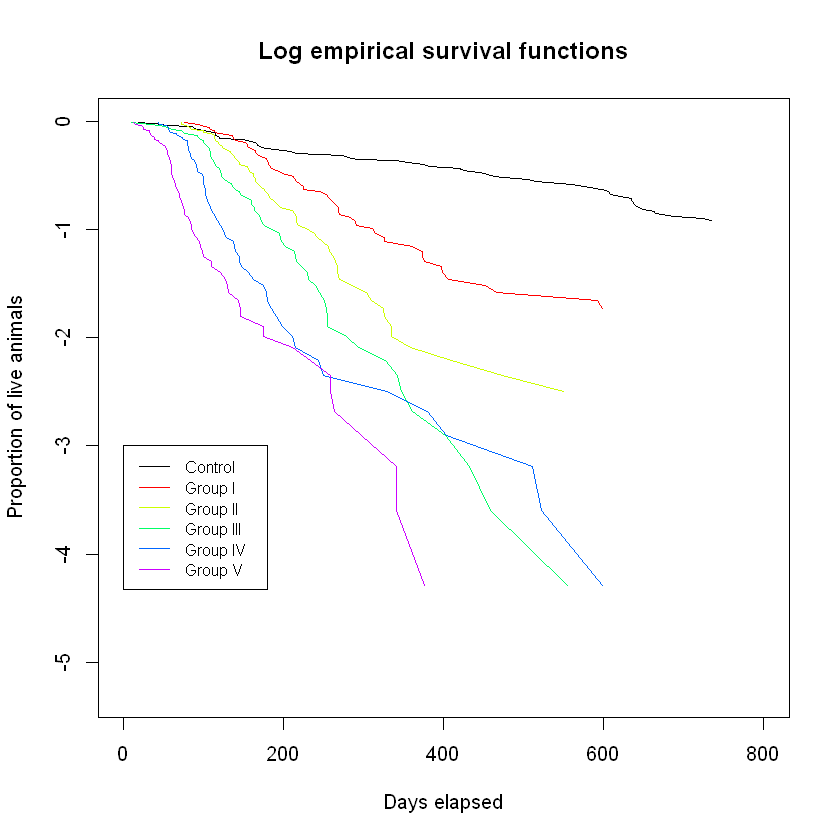

In [34]:
# Redo plot with log scale

plot(gpigscontrol, log(gpigscontrol.esf), xlim = xlim0, ylim = c(log(.005), log(1.0)), main = "Log empirical survival functions",
    xlab = "Days elapsed", ylab = "Proportion of live animals", type = "l", col = 'black')

cols.groups <- rainbow(5)

lines(gpigs1, log(gpigs1.esf), lty = 1, col = cols.groups[1])
lines(gpigs2, log(gpigs2.esf), lty = 1, col = cols.groups[2])
lines(gpigs3, log(gpigs3.esf), lty = 1, col = cols.groups[3])
lines(gpigs4, log(gpigs4.esf), lty = 1, col = cols.groups[4])
lines(gpigs5, log(gpigs5.esf), lty = 1, col = cols.groups[5])

legend(x = 0, y = -3.0, legend = c("Control", paste("Group ", c("I", "II", "III", "IV", "V"), sep = "")),
      lty = rep(1, times = 6), 
       col = c('black', cols.groups),
       cex = .8)

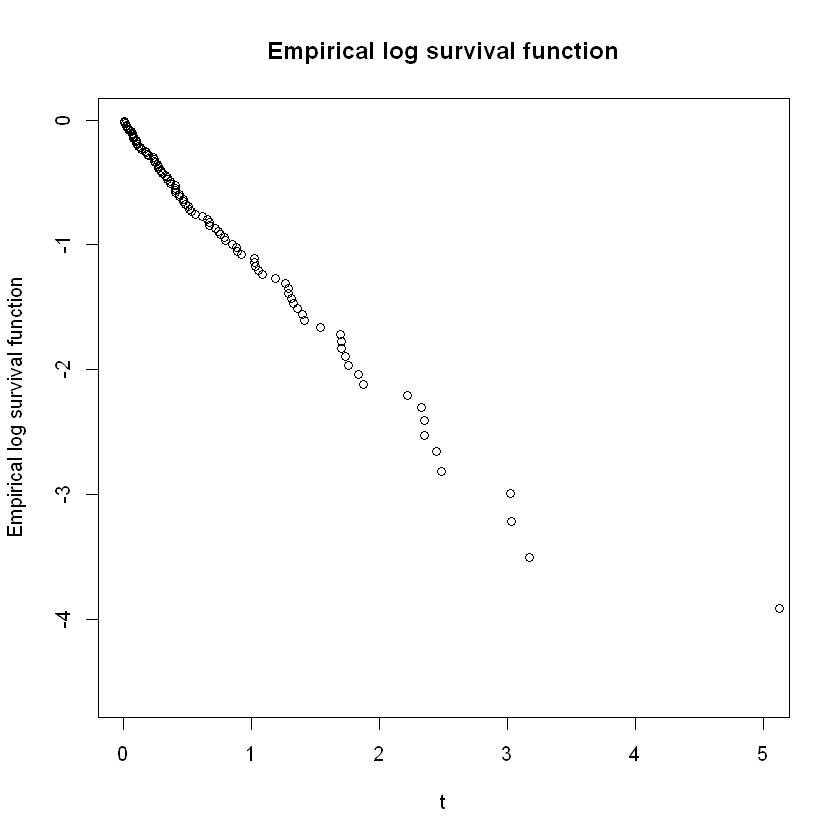

In [35]:
t <- rexp(100, rate = 1)

t.ecdf = ecdf(t)
t.ordered = sort(t)

plot(x = t.ordered, y = log(1 - t.ecdf(t.ordered)), xlim = c(0, 5), xlab = "t", ylab = "Empirical log survival function",
    main = "Empirical log survival function")

In [36]:
x = -log(t)

SDESF = sqrt(0.01 * (1-t) / t)

Warning message in sqrt(0.01 * (1 - t)/t):
"NaNs produced"

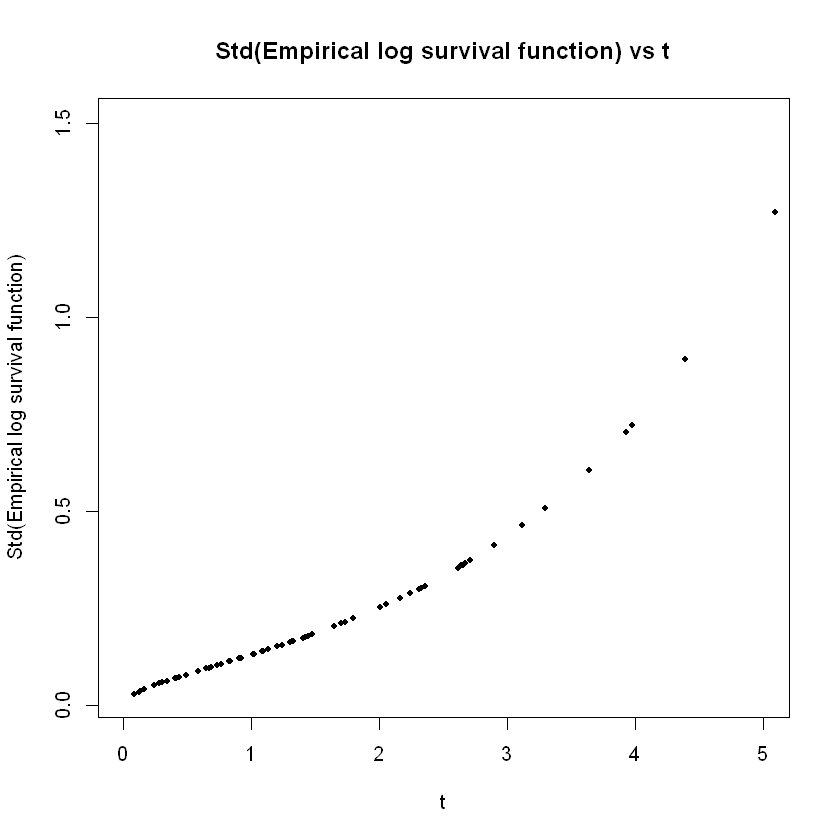

In [37]:
plot(x, SDESF, type = "p", pch = 20, xlim = c(0, 5), xlab = "t",
    ylab = "Std(Empirical log survival function)", main = "Std(Empirical log survival function) vs t")

In [38]:
windspeed = read.table(file = "Rice 3e Datasets/ASCII Comma/Chapter 10/windspeed.txt",
                      sep = ",", stringsAsFactors = FALSE)
windspeed.0 = t(windspeed[,-1])
dimnames(windspeed.0) <- list(c(1:nrow(windspeed.0)), windspeed[,1])
dim(windspeed.0)

[1] 37 21

In [39]:
head(windspeed.0)

,Cairo,Alpena,TatoushIsland,Williston,Richmond,Burlington,Eastport,Canton,Yuma,Duluth,...,Charleston,Eureka,OklahomaCity,Baker,Sheridan,BlockIsland,Winnemucca,NorthHead,KeyWest,CorpusChristi
1,35,38,68,38,46,40,53,51,32,54,...,52,35,56,27,44,60,36,69,32,47
2,38,43,51,50,48,47,41,53,32,49,...,49,35,41,30,38,54,32,65,40,41
3,33,41,65,40,41,43,54,50,29,49,...,46,46,44,29,41,65,36,70,39,41
4,35,39,61,35,43,40,49,44,32,46,...,43,46,57,28,43,63,32,63,44,40
5,40,41,68,38,37,41,60,46,32,50,...,50,35,48,28,40,56,38,73,41,90
6,38,38,54,41,47,50,54,44,37,45,...,37,35,43,30,38,59,41,65,40,38


In [40]:
tail(windspeed.0)

,Cairo,Alpena,TatoushIsland,Williston,Richmond,Burlington,Eastport,Canton,Yuma,Duluth,...,Charleston,Eureka,OklahomaCity,Baker,Sheridan,BlockIsland,Winnemucca,NorthHead,KeyWest,CorpusChristi
32,37,38,64,34,46,41,42,42,29,50,...,33,41,26,28,51,70,45,77,40,54
33,34,47,62,35,40,40,51,32,30,54,...,60,37,34,25,52,82,33,65,56,45
34,40,42,66,42,34,42,55,34,33,49,...,57,35,28,30,59,63,42,64,40,56
35,43,45,59,46,32,42,44,39,37,61,...,43,38,31,28,57,56,42,67,35,43
36,43,50,61,41,41,43,52,34,34,49,...,45,34,37,30,66,67,39,66,54,41
37,45,42,66,44,38,46,48,35,41,49,...,34,35,33,33,56,57,40,69,78,35


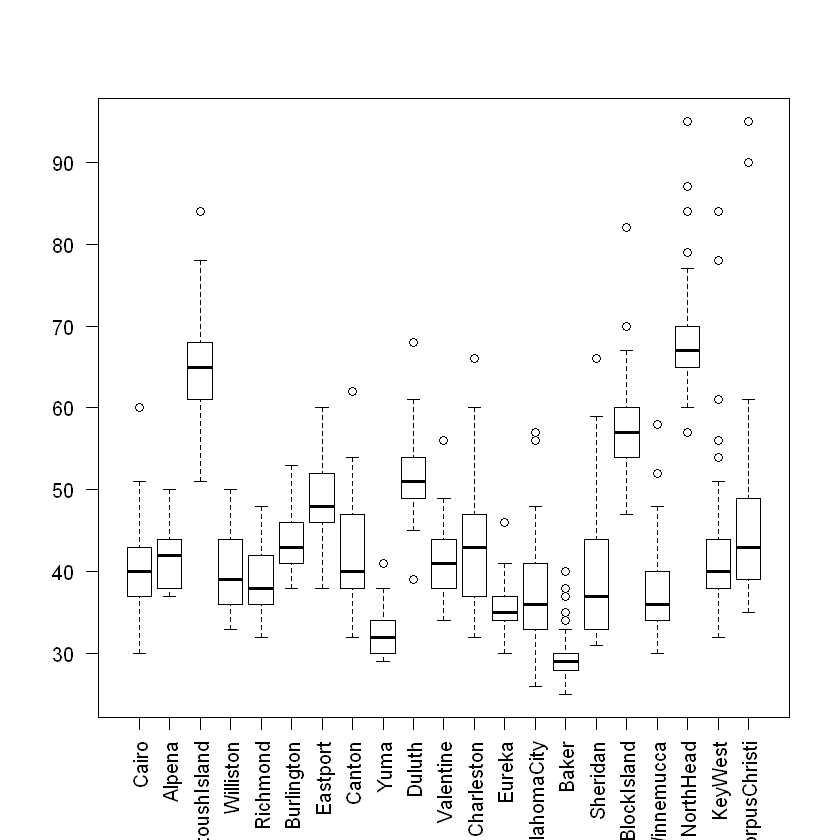

In [41]:
boxplot(windspeed.0, horizontal= FALSE, las = 2, cex.lab = .5)